## Decision Trees

## Decision Tree vs Linear / Logistic Regression

| Aspect                       | **Decision Tree** 🌲                                    | **Linear / Logistic Regression** 📈                                       |
| ---------------------------- | ------------------------------------------------------- | ------------------------------------------------------------------------- |
| **Type of target**           | Classification (categorical) or Regression (numeric)    | Linear → numeric, Logistic → categorical                                  |
| **Model assumption**         | No assumptions about data distribution                  | Assumes linear relationship between features and target (linear/log-odds) |
| **Decision boundary**        | Piecewise constant, rule-based (rectangular regions)    | Linear/Logistic: straight line (hyperplane) in feature space              |
| **Non-linearity**            | Captures non-linear + interaction effects automatically | Needs explicit transformations (polynomials, interaction terms)           |
| **Interpretability**         | Rule-based: “If BP > 130 and Age > 45 → High risk”      | Coefficient-based: “1 unit ↑ in BP increases odds by 15%”                 |
| **Feature scaling**          | Not needed (invariant to monotonic transforms)          | Required (especially linear regression with gradient-based solvers)       |
| **Categorical features**     | Can split directly (if supported)                       | Must be one-hot/dummy encoded                                             |
| **Sensitivity to data**      | High variance → prone to overfitting without pruning    | More stable, less prone to overfitting on small data                      |
| **Performance (small data)** | Can overfit easily, needs pruning/regularization        | Efficient and reliable with small datasets                                |
| **Inference vs prediction**  | Great for **prediction** (patterns, rules)              | Great for **inferenc**                                                    |


- Decision Trees do NOT need scaling.
- Decision Trees do NOT need one-hot encoding strictly — but they DO need numerical representation.
- Hence use pd.get_dummies for categorical variables

### 1. Nature of the relationship between X and y

- Linear/Logistic Regression assumes a specific functional form:
    - Linear regression: 𝑦 ≈ 𝛽0 + 𝛽1X1 + ⋯ + 𝛽𝑛X𝑛	​
    - Logistic regression: 𝑃(𝑦=1) = 1 / (1 + 𝑒^−(𝛽0 + 𝛽1𝑥1 + … )
- → The decision boundary is a line (or hyperplane).

- Decision Trees don’t assume any functional form.
    - They split data into rectangles/segments of the feature space.
    - **Can model non-linear, non-monotonic, interaction-heavy relationships**.
    - **non-parametric** algorithms, helps in prediction of continuous and categorical data both.

- 🔹 If the data is linear-ish, regression is often more efficient & interpretable.
- 🔹 If the data is non-linear, with thresholds or rules → trees shine.

Example of non-linear relationship in Druge Dosage - 
- dosage within the prescribed amount, has improved effectivess.
- overdose can lead to adverse effects with low effectiveness

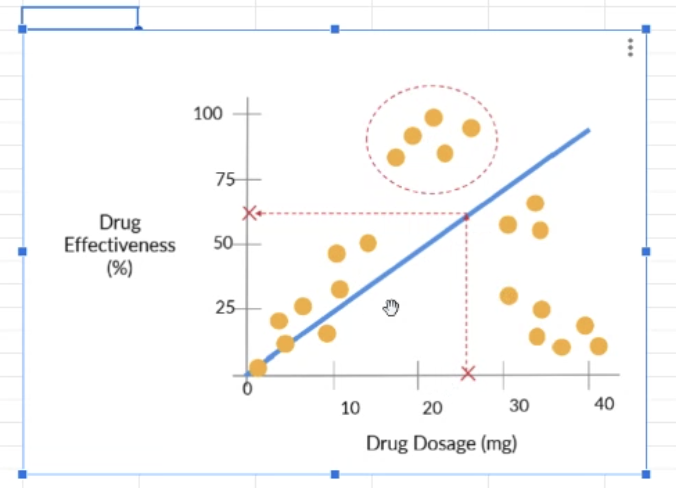

Economies of Scale
- Fixed costs (rent of machine) to manufacture remain same. 
- If you manufacture extra units, the cost per unit starts dropping drastically

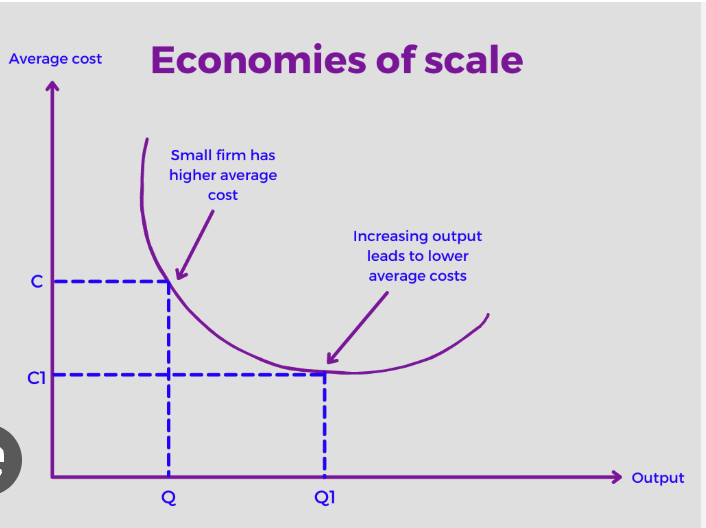

### 2. Interpretability

- Linear/Logistic Regression:
    - **Very interpretable: coefficients tell you how much each feature matters**.
    - Good for inference / understanding effect size (e.g. “Each 10mmHg BP ↑ increases odds of risk by 15%”).

- Decision Trees:
    - **Interpretability is rule-based**: “If BP ≤130 and Age >45 → predict High risk.”
    - Easier for humans to follow as rules, but not good for estimating marginal effects.

### 3. Feature interactions

- Regression:
    - **Needs explicit interaction terms (age * BP) if interactions matter**.
    - Without them, model can miss non-linear relationships.

- Trees:
    - **Handle interactions automatically** (because a split on BP may then split on Age).
    - Example: "BP > 130 only matters for Age > 50" → naturally captured by tree.

### 4. Robustness to scaling & preprocessing

- Regression:
    - Sensitive to scaling (especially linear regression).
    - Needs normalization/standardization for gradient-based optimizers.
    - Sensitive to multicollinearity (features highly correlated).

- Trees:
    - **Invariant to monotonic scaling (age in years vs months → same splits)**.
    - **Handle multicollinearity better, but may still split redundantly**.

### 5. Handling of categorical variables

- Regression:
    - **Needs dummy encoding** (one-hot).
    - Logistic regression can blow up with high-cardinality categories.

- Trees:
    - **Can split on categories directly** (though scikit-learn needs them encoded as integers).
    - Work well with categorical splits (e.g. "if sex = M").

### 6. Data size & performance

- Regression:
    - **Works very well on small datasets (low variance, fewer parameters)**.
    - Statistical efficiency: fewer samples needed.

- Trees:
    - **More prone to overfitting on small datasets (need pruning)**.
    - **Work well when dataset is bigger & more complex**.

----

## Decision Trees: Two Flavors

### 1. Classification Trees (a.k.a. Decision Trees for Classification)

- Target variable: Categorical (discrete labels: e.g. Yes/No, High/Medium/Low, dog breeds).

- Splitting criterion:
    - Gini index or Entropy (information gain).
    - Measures how “mixed” the classes are in a node.
- **Prediction at a leaf**:
    - **Majority class (or probability distribution across classes)**.
- 🔹 Example: Predicting heart_risk (Low, Moderate, High) based on age, BP, and sex.
    - The leaf might say:
    - “If BP ≤ 130 and age ≤ 35 → 100% Low risk.”

### 2. Regression Trees

- Target variable: Continuous numeric values (e.g. house prices, blood sugar level, years until risk).

- Splitting criterion:
    - Variance reduction / Mean Squared Error (MSE).
    - Each split chosen to minimize the variability of numeric values in child nodes.

- **Prediction at a leaf**:
    - **Mean (average) of target values in that leaf**.

- 🔹 Example: Predicting years_to_risk (numeric).
    - The leaf might say:
    - “If BP ≤ 130 and age ≤ 35 → average = 25 years.”

| Aspect                  | Classification Tree 🌈                  | Regression Tree 📈                   |
| ----------------------- | --------------------------------------- | ------------------------------------ |
| Target variable type    | Categorical (discrete classes)          | Continuous (numeric values)          |
| Split criterion         | Gini index / Entropy (information gain) | Variance reduction / MSE             |
| Leaf prediction         | Majority class (or class probabilities) | Mean value of observations in leaf   |
| Loss function optimized | Misclassification impurity              | Squared error (MSE) or sometimes MAE |
| Example output          | `High risk` (class)                     | `7.3 years` (numeric)                |


### ✅ Rule of Thumb:
- Ask yourself: Is my target variable categorical or numeric?
- That single question decides classification tree vs regression tree.

A decision tree greedily picks the split that most reduces impurity at each node (Gini or entropy for classification; variance/MSE for regression), recurses until stopping rules or purity, and then predicts either the majority class (classification) or the mean (regression) in each leaf. In our tiny cardiology example, BP was the most informative feature and splitting on BP then age produced very clean leaves for both targets.

----

Lets use a small dataset with three features — age (years), BP (systolic blood pressure), sex (M/F) — and two targets:

- `heart_risk` (categorical: Low, Moderate, High) → classification tree
- `years_to_risk` (numeric, years until risk) → regression tree

| id | age | BP  | sex | heart_risk | years_to_risk |
| -- | --- | --- | --- | ---------- | ------------- |
| 1  | 45  | 130 | M   | Moderate   | 8             |
| 2  | 60  | 150 | M   | High       | 3             |
| 3  | 50  | 120 | F   | Moderate   | 10            |
| 4  | 30  | 110 | F   | Low        | 25            |
| 5  | 55  | 140 | F   | High       | 4             |
| 6  | 40  | 125 | M   | Moderate   | 12            |
| 7  | 25  | 115 | M   | Low        | 30            |
| 8  | 65  | 160 | F   | High       | 2             |
| 9  | 35  | 118 | F   | Low        | 20            |
| 10 | 48  | 135 | M   | Moderate   | 7             |


### Quick idea: how a decision tree is built (high level)

- Start at the root (all 10 rows).

- For every feature, consider possible splits (for continuous features like age or BP: thresholds between sorted unique values).

- For each candidate split compute how impure the resulting child nodes would be. For classification impurity = Gini or entropy; for regression impurity = variance / MSE.

- Choose the split that maximizes impurity decrease (equivalently minimizes weighted impurity after the split).

- Recurse on each child until a stopping criterion (max depth, min samples, pure node, etc.).

We’ll compute a few candidate splits and show the exact numbers.

---

## Pruning

- How do we know which variable to start with and which should be next?
- How many levels we should create in the tree?
- Hoe many min observations required in the final nodes to be able to make a decision?
- For continuous data, how to decide the cut off level for the split?

### Classification tree — impurity math (Gini & Entropy) at the root

**Class proportions at root:**
- p(Low)=3/10=0.3, p(Mod)=4/10=0.4, p(High)=3/10=0.3.

**Gini at root:**
- Gini = 1 − Σ pᵢ² = 1 − (0.3² + 0.4² + 0.3²)
    - = 1 − (0.09 + 0.16 + 0.09) = 1 − 0.34 = **0.66**

**Entropy at root (bits):**

- Entropy = −Σ pᵢ log₂ pᵢ
    - = −[0.3·log₂0.3 + 0.4·log₂0.4 + 0.3·log₂0.3]
    - log₂0.3 ≈ −1.737, contribution 0.3·1.737 = 0.52109 (×2 for two 0.3 terms)
    - log₂0.4 ≈ −1.322, contribution 0.4·1.322 = 0.52877
    - Entropy ≈ 0.52109 + 0.52877 + 0.52109 = 1.57095 bits

**Intuition:**
- **Lower Gini - better split**. Higher entropy/Gini = more mixed. If node was pure (all same class) both would be 0.


----
### Try three simple candidate splits (calculate impurity after split)

#### A — Split: BP ≤ 130 vs BP > 130

- **Left (BP ≤ 130)**: rows 1,3,4,6,7,9 → classes = {Moderate, Moderate, Low, Moderate, Low, Low}
    - counts: Low=3, Mod=3, High=0 → p = [3/6, 3/6, 0/6] = [0.5, 0.5, 0]

    - **Gini_left** = 1 − (0.5² + 0.5²) = 1 − (0.25 + 0.25) = 0.5
    - Entropy_left = −(0.5·log₂0.5 + 0.5·log₂0.5) = 1.0 bit


- **Right (BP >130)**: rows 2,5,8,10 → classes = {High, High, High, Moderate}
    - counts: Low=0, Mod=1, High=3 → p = [0/4, 1/4, 3/4] = [0, 0.25, 0.75] (Low=0, Mod=0.25, High=0.75)


    - **Gini_right** = 1 − (0.75² + 0.25²) = 1 − (0.5625 + 0.0625) = 0.375
    - Entropy_right = −(0.75·log₂0.75 + 0.25·log₂0.25) ≈ 0.81128 bits

- **Weighted impurity after split** (weights by node sizes 6 and 4):

    - **Weighted Gini** = (6/10)·0.5 + (4/10)·0.375 = 0.3 + 0.15 = 0.45
    - **Gini decrease** = root 0.66 − subnode 0.45 = 0.21


    - Weighted Entropy = 0.6·1 + 0.4·0.81128 = 0.6 + 0.32451 = 0.92451
    - Information gain = root entropy 1.57095 − 0.92451 = 0.64644 bits

#### B — Split: age ≤ 45 vs age > 45

- **Left (≤45)**: rows 1,4,6,7,9 → counts Low=3, Mod=2, High=0
    - **Gini_left** = 1 − (0.6² + 0.4²) = 0.48
    - Entropy_left ≈ 0.97095 bits

- **Right (>45)**: rows 2,3,5,8,10 → counts High=3, Mod=2, Low=0
    - Gini_right = 0.48 (symmetric)
    - Entropy_right ≈ 0.97095 bits

- **Weighted Gini** = 0.5·0.48 + 0.5·0.48 = 0.48
    - **Gini decrease** = 0.66 − 0.48 = 0.18
    - Weighted Entropy = 0.97095 bits → Info gain = 0.6 bits

#### C — Split: sex = M vs sex = F

- **Males (5 rows)**: counts Low=1, Mod=3, High=1 → p ≈ [0.2, 0.6, 0.2]
    - Gini_male = 1 − (0.6² + 0.2² + 0.2²) = 0.56
    - Entropy_male ≈ 1.37095 bits

- **Females (5 rows)**: counts Low=2, Mod=1, High=2 → p ≈ [0.4, 0.2, 0.4]
    - Gini_female = 1 − (0.4² + 0.2² + 0.4²) = 0.64
    - Entropy_female ≈ 1.52193 bits

- **Weighted Gini** = 0.5·0.56 + 0.5·0.64 = 0.6 → Gini decrease = 0.66 − 0.6 = 0.06
- Info gain (entropy) ≈ 1.57095 − 1.44644 = 0.1245 bits

#### Which split is chosen at the root?

- **By Gini: BP ≤ 130 (Gini decrease 0.21) beats age (0.18) and sex (0.06)**.

- **By Entropy (information gain)**: BP ≤ 130 (gain ≈ 0.6464 bits) also beats age (0.6 bits) and sex (0.1245).

So BP ≤ 130 is the best root split in this dataset.

#### Continue building: split the left child (BP ≤ 130)

- Left child (6 rows) had classes: Low=3, Moderate=3. We look for further splits inside this node.

- Try age ≤ 35 inside the left child:

    - Left-left (BP ≤130 & age ≤35): rows 4,7,9 → all Low (counts Low=3). Pure node: Gini = 0, Entropy = 0.

    - Left-right (BP ≤130 & age >35): rows 1,3,6 → all Moderate (counts Mod=3). Pure node: Gini = 0.

    - Both child nodes are pure after that age split → perfect separation. So the tree stops here for those branches (purity reached).

- Right child (BP >130) still has 4 rows (High=3, Moderate=1). You could attempt further splits there (e.g. by age to separate the one moderate), but in a simple example we might stop if a depth or min-sample rule is met.

```yaml
Root: BP ≤ 130 ?
 ├─ Yes (6 rows):
 │    age ≤ 35 ?
 │      ├─ Yes → Leaf: Low       (3 rows)  → P(Low)=1.0
 │      └─ No  → Leaf: Moderate  (3 rows)  → P(Moderate)=1.0
 └─ No  (4 rows) → Leaf: High (majority)
                    counts: High=3, Moderate=1 → predict High; P(High)=0.75, P(Mod)=0.25
```

**Prediction rule example**: 
- someone with BP 128 and age 42 → BP≤130 true, age≤35 false → predict Moderate risk.

- The tree used BP first (most informative), then age, and sex never used (it didn’t help split classes much).

---
### Regression tree (years_to_risk) — variance / MSE criterion

**For regression the impurity is typically variance (MSE) inside the node. A split is chosen to minimize weighted MSE after the split.**

#### Root (all 10 rows):

- **Mean years_to_risk** = (8 + 3 + 10 + 25 + 4 + 12 + 30 + 2 + 20 + 7) / 10 = 121 / 10 = 12.1 years

- **Root MSE (average squared deviation)** =
    - compute each (y − 12.1)² and sum:
    - 16.81, 82.81, 4.41, 166.41, 65.61, 0.01, 320.41, 102.01, 62.41, 26.01 → sum = 846.90

    - Root MSE = 846.90 / 10 = 84.69

**(So average squared error if we predicted 12.1 for everybody is 84.69.)**

#### Split: BP ≤ 130 vs BP > 130 (same split as classification)

- **Left (BP ≤130)**: values = [8, 10, 25, 12, 30, 20]
    - mean_left = 105 / 6 = 17.5
    - SSE_left (sum squared errors) = 395.5 → MSE_left = 395.5 / 6 = 65.9167

- **Right (BP >130)**: values = [3, 4, 2, 7]
    - mean_right = 16 / 4 = 4.0
    - SSE_right = 14 → MSE_right = 14 / 4 = 3.5

- **Weighted MSE after split** = (6/10)·65.9167 + (4/10)·3.5 = 39.55 + 1.4 = 40.95

- **MSE reduction** = root 84.69 − 40.95 = 43.74

- This is a big reduction — the BP split explains a lot of the target variance.

#### Further split left node (BP ≤130) by age ≤35

- Left-left (BP ≤130 & age ≤35): values [25, 30, 20] → mean = 25 → MSE = 50/3 ≈ 16.6667

    - Left-right (BP ≤130 & age >35): values [8,10,12] → mean = 10 → MSE = 8/3 ≈ 2.6667

    - Weighted MSE for the left subtree = (3/6)·16.6667 + (3/6)·2.6667 = 9.6667

    - Weighted contribution to total MSE = (6/10)·9.6667 = 5.8

- Right child contribution remains (4/10)*3.5 = 1.4

- Total weighted MSE after both splits = 5.8 + 1.4 = 7.2

- MSE reduction from root = 84.69 − 7.2 = 77.49 → excellent.

```yaml
Root: BP ≤ 130 ?
 ├─ Yes (6 rows):
 │    age ≤ 35 ?
 │      ├─ Yes → Leaf: predict mean = 25 years (rows 4,7,9)
 │      └─ No  → Leaf: predict mean = 10 years (rows 1,3,6)
 └─ No  (4 rows) → Leaf: predict mean = 4 years (rows 2,5,8,10)
```

Example: BP=128, age=42 → predict 10 years.
- This simple tree fits our toy data very well (low MSE ≈ 7.2).

----
## Gini vs Entropy (intuitively)

**Gini index (1 − Σ pᵢ²)**: measures impurity; ranges 0 (pure) to near 1 (max mix). It is computationally simple and is the default splitting criterion for CART. Intuition: if you randomly label an observation according to the node’s class distribution, Gini relates to the expected misclassification probability.

**Entropy (−Σ pᵢ log₂ pᵢ)**: comes from information theory (how “surprising” the distribution is). Also 0 for pure nodes; higher value when class probabilities are more uniform. Splits are chosen to maximize information gain (reduction in entropy).

**Both rank splits similarly most of the time; small practical differences exist (Gini slightly faster, entropy sometimes prefers more balanced splits)**.

---
### Practical points / tips (so this doesn’t overfit your cardiologist)

- **How continuous splits are chosen**: try thresholds at midpoints between sorted unique feature values (e.g., between 130 and 135 try 132.5, etc.) and evaluate impurity for each candidate.

- **Stopping / pruning**: without limits a tree can perfectly memorize training data (overfit). Use max depth, min samples per leaf, or cost-complexity pruning to keep generalization good.

- **Categorical features**: can be split directly (e.g., sex=M?) or converted; for multi-category you might test subsets.

- **Probabilities (classification)**: leaf class probabilities = class proportions in leaf (useful when you want risk probability, not just a label).

- **Feature importance**: sum of impurity decreases (Gini/entropy) contributed by splits on a feature gives an importance score.

---
## 🔪 Pruning in Decision Trees

### 1. Pre-pruning (a.k.a Early Stopping)

Stop the tree from growing too deep/complex while building it.

Common methods:
- `max_depth` → set maximum depth of the tree. Example: max_depth=3 stops after 3 levels.
- `min_samples_split` → minimum number of samples required to split a node. Prevents splitting when data is too small to be meaningful.
- `min_samples_leaf` → minimum samples required in a leaf. Avoids tiny leaves with 1–2 samples (pure but not useful).
- `max_leaf_nodes` → limit number of leaf nodes.
- `min_impurity_decrease` → stop splitting if impurity reduction is too small.

👉 Pre-pruning = a form of regularization. Simple to apply, fast, but may sometimes stop “too early” (miss useful splits).

### 2. Post-pruning (a.k.a Cost-Complexity Pruning, Reduced Error Pruning)

First grow the full tree (to purity), then cut back branches that don’t improve generalization.

Common methods:
- **Cost-Complexity Pruning (CCP)** (CART method, used in scikit-learn):
    - Add penalty for tree size: 𝑅𝛼(𝑇) = 𝑅(𝑇) + 𝛼⋅∣𝑇∣
        - where 
            - R(T) = misclassification error or MSE, and 
            - ∣T∣ = number of leaf nodes.
    - As α (alpha) increases, more branches are pruned.
    - Choose best α via cross-validation.
- **Reduced Error Pruning (REP)**:
    - Grow full tree, then iteratively remove nodes if pruning them does not reduce validation error.
    - Simple, but less commonly used in modern libraries.
- **Minimum Error Pruning / Pessimistic Pruning (Quinlan’s C4.5 style)**:
    - Uses statistical estimates of error at each node to decide pruning.
    - Prunes branches if estimated error after pruning is less than keeping them.

👉 Post-pruning = more accurate, since tree is fully grown first → but more computationally expensive.

| Type                                 | Method Examples                                                                                 | Pros                                    | Cons                         |
| ------------------------------------ | ----------------------------------------------------------------------------------------------- | --------------------------------------- | ---------------------------- |
| **Pre-pruning** (early stop)         | `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`, `min_impurity_decrease` | Fast, simple, prevents overgrowth early | May stop too early, underfit |
| **Post-pruning** (after full growth) | Cost-Complexity Pruning (CCP), Reduced Error Pruning, Pessimistic Pruning                       | More accurate, considers full structure | Slower, needs validation set |


### ⚡ Rule of thumb:
- Start with pre-pruning (max_depth, min_samples_leaf) — simple, fast.
- If you want maximum performance, add post-pruning (ccp_alpha) with cross-validation.

----

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# ----------------------------
# 1. Create small dataset
# ----------------------------
data = {
    "age": [45, 60, 50, 30, 55, 40, 25, 65, 35, 48],
    "BP": [130, 150, 120, 110, 140, 125, 115, 160, 118, 135],
    "sex": ["M", "M", "F", "F", "F", "M", "M", "F", "F", "M"],
    "heart_risk": ["Moderate", "High", "Moderate", "Low", "High", "Moderate",
                   "Low", "High", "Low", "Moderate"],
    "years_to_risk": [8, 3, 10, 25, 4, 12, 30, 2, 20, 7]
}

df = pd.DataFrame(data)

In [3]:
# Encode categorical variable "sex"
df['sex'] = df['sex'].map({'M': 0, 'F': 1})


In [4]:
# Features and targets
X = df[['age', 'BP', 'sex']]
y_class = df['heart_risk']
y_reg = df['years_to_risk']

In [5]:
# ----------------------------
# 2. Train-test split
# ----------------------------
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.3, random_state=42, stratify=y_class)

X_train_r, X_test_r, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.3, random_state=42)

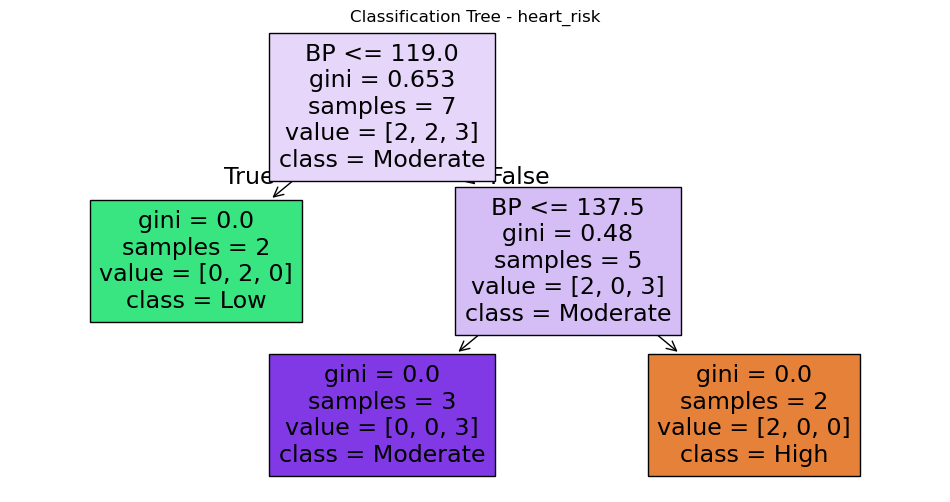

Classification classes order: ['High' 'Low' 'Moderate']


In [11]:
# ----------------------------
# 3. Classification Tree
# ----------------------------
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_class)

# The order ['age','BP','sex'] must match the column order in X_train you used to fit the model.
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=['age','BP','sex'], class_names=clf.classes_, filled=True)
plt.title("Classification Tree - heart_risk")
plt.show()

print("Classification classes order:", clf.classes_) # ['High' 'Low' 'Moderate']

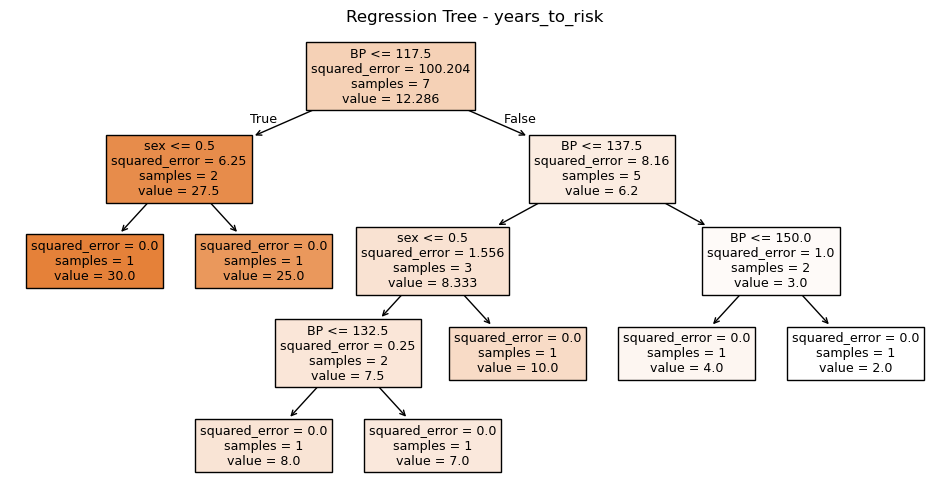

In [7]:
# ----------------------------
# 4. Regression Tree
# ----------------------------
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train_r, y_train_reg)

plt.figure(figsize=(12,6))
plot_tree(reg, feature_names=['age','BP','sex'], filled=True)
plt.title("Regression Tree - years_to_risk")
plt.show()

In [8]:
# ----------------------------
# 5. Hyperparameter Tuning (Classification)
# ----------------------------
param_grid_clf = {
    'max_depth': [2, 3, 4, None],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.05]  # cost complexity pruning parameter
}

grid_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_clf,
    cv=3,
    scoring='accuracy'
)
grid_clf.fit(X_train, y_train_class)

print("Best parameters (Classification):", grid_clf.best_params_)
print("Best CV Accuracy:", grid_clf.best_score_)


/opt/homebrew/Caskroom/miniforge/base/envs/ai-lab/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters (Classification): {'ccp_alpha': 0.0, 'max_depth': 2, 'min_samples_leaf': 1}
Best CV Accuracy: 0.5555555555555555


In [9]:
# ----------------------------
# 6. Hyperparameter Tuning (Regression)
# ----------------------------
param_grid_reg = {
    'max_depth': [2, 3, 4, None],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.05]
}

grid_reg = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_reg,
    cv=3,
    scoring='neg_mean_squared_error'
)
grid_reg.fit(X_train_r, y_train_reg)

print("Best parameters (Regression):", grid_reg.best_params_)
print("Best CV Score (neg MSE):", grid_reg.best_score_)

Best parameters (Regression): {'ccp_alpha': 0.0, 'max_depth': 3, 'min_samples_leaf': 1}
Best CV Score (neg MSE): -149.88888888888889


### 1. Classification Tree Performance (heart_risk)

For classification we usually check:
- Accuracy (overall correct predictions)
- Precision, Recall, F1-score (class-wise metrics, especially when imbalance exists)
- Confusion Matrix (where errors happen)
- Cross-validation scores (to see stability)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------
# 1. Classification Tree Performance
# ----------------------------
y_pred_train_class = clf.predict(X_train)
y_pred_test_class = clf.predict(X_test)

print("=== Classification Tree Performance ===")
print("Train Accuracy:", accuracy_score(y_train_class, y_pred_train_class))
print("Test Accuracy :", accuracy_score(y_test_class, y_pred_test_class))


print("=== Classification Report (Train vs Test) ===")
print("\nClassification Report (Train):\n", classification_report(y_train_class, y_pred_train_class))
print("\nClassification Report (Test):\n", classification_report(y_test_class, y_pred_test_class))


print("=== Confusion Matrix (Train vs Test) ===")
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_class, y_pred_train_class))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test_class, y_pred_test_class))



=== Classification Tree Performance ===
Train Accuracy: 1.0
Test Accuracy : 1.0
=== Classification Report (Train vs Test) ===

Classification Report (Train):
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         2
         Low       1.00      1.00      1.00         2
    Moderate       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7


Classification Report (Test):
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       1.00      1.00      1.00         1
    Moderate       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

=== Confusion Matrix (Train vs Test) ===
Confus

### 2. Regression Tree Performance (years_to_risk)

For regression we usually check:
- MSE (Mean Squared Error) — penalizes large errors strongly
- RMSE (Root MSE) — interpretable in original units
- MAE (Mean Absolute Error) — more robust to outliers
- R² (Coefficient of Determination) — how much variance explained

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred_train_reg = reg.predict(X_train_r)
y_pred_test_reg = reg.predict(X_test_r)

# Training metrics
mse_train = mean_squared_error(y_train_reg, y_pred_train_reg)
mae_train = mean_absolute_error(y_train_reg, y_pred_train_reg)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_reg, y_pred_train_reg)

# Test metrics
mse_test = mean_squared_error(y_test_reg, y_pred_test_reg)
mae_test = mean_absolute_error(y_test_reg, y_pred_test_reg)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_reg, y_pred_test_reg)

print("\n=== Regression Tree Performance ===")
print("Train MSE:", mse_train, " | Test MSE:", mse_test)
print("Train MAE:", mae_train, " | Test MAE:", mae_test)
print("Train RMSE:", rmse_train, " | Test RMSE:", rmse_test)
print("Train R²:", r2_train, " | Test R²:", r2_test)


=== Regression Tree Performance ===
Train MSE: 0.0  | Test MSE: 39.0
Train MAE: 0.0  | Test MAE: 5.0
Train RMSE: 0.0  | Test RMSE: 6.244997998398398
Train R²: 1.0  | Test R²: 0.1912442396313363
